In [1]:
import sys
import os
import matplotlib.pyplot as plt
os.environ["CUDA_VISIBLE_DEVICES"]=""
import glob
sys.path.append("../AnalyzeCSV")
import numpy as np
from tifffile import imread
from CreateImages import TimelapseImage, TwoDImage, CountTimeLapseevents,MultiCountTimeLapseevents
try:
    from pathlib import Path
    Path().expanduser()
except (ImportError,AttributeError):
    from pathlib2 import Path

try:
    import tempfile
    tempfile.TemporaryDirectory
except (ImportError,AttributeError):
    from backports import tempfile

# Input the event names as they appear on the csv files

In [2]:
#Event File Append names
Division = 'ONETDivision'
Apoptosis = 'ONETApoptosis'
Mature = 'CNNMatureMNMCNNresnet_v2d47cl16Location'
NonMature = 'CNNNonMatureMNMCNNresnet_v2d47cl16Location'
Macrocheate = 'CNNMacroKittyMNMCNNresnet_v2d47cl16Location'

# The block below opens all the csv files and needs the Image directory they correspond to. It will then generate images with dots showing where the event was found

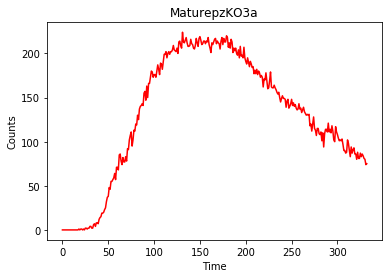

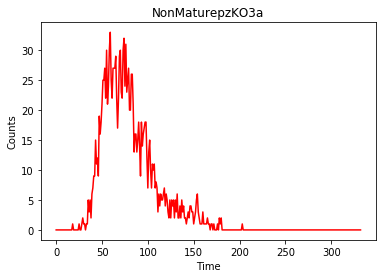

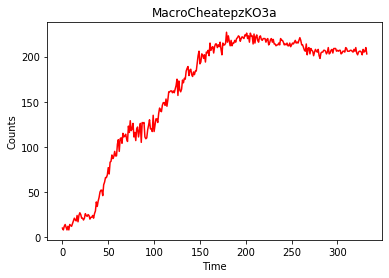

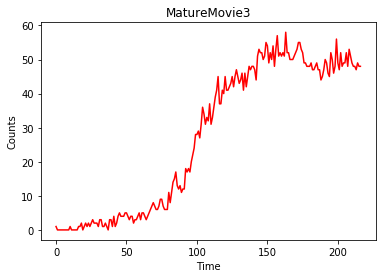

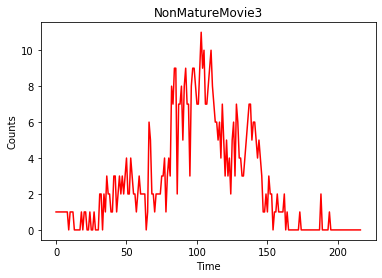

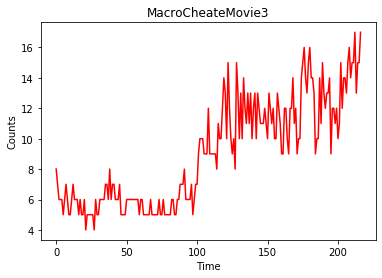

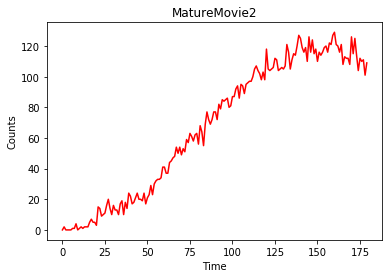

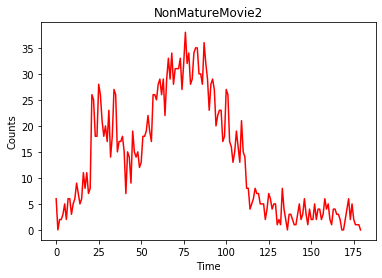

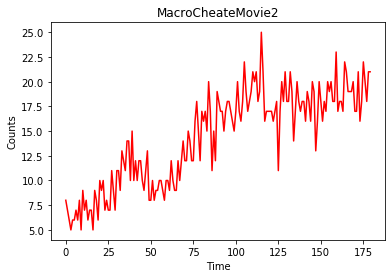

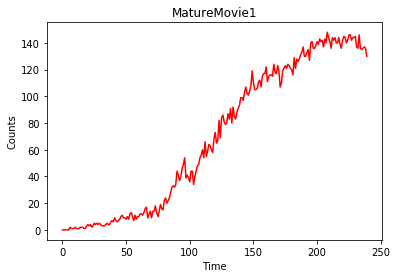

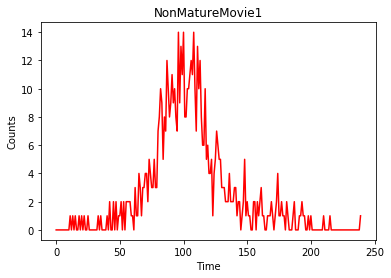

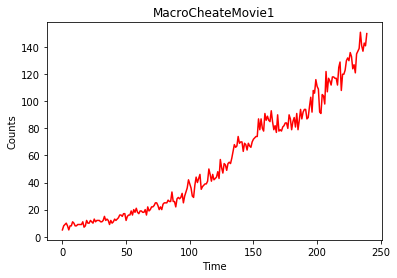

In [3]:
save_dir = '/Users/aimachine/ONEATTests/Movies/CSVResults/d47cl16/ImageResults/'
csv_dir = '/Users/aimachine/ONEATTests/Movies/CSVResults/d47cl16/'
image_dir =  '/Users/aimachine/ONEATTests/Movies/'
 

Raw_path = os.path.join(image_dir,'*.tif')
X = glob.glob(Raw_path)




Path(save_dir).mkdir(exist_ok = True)


for image_file in X:

  image= imread(image_file)
  image = np.asarray(image)
  Name = os.path.basename((os.path.splitext(image_file)[0])) 

  #Division Events 
  csv_Name = Division + Name
  csv_file = csv_dir + csv_Name + '.csv'

  if os.path.exists(csv_file):

      emptyimage = np.zeros([image.shape[0], image.shape[1], image.shape[2]], dtype='uint16')
      TimelapseImage(csv_file, emptyimage, csv_Name, save_dir)
      CountTimeLapseevents(csv_file,emptyimage, csv_Name, save_dir)

  #Apoptosis Events 
  csv_Name = Apoptosis + Name
  csv_file = csv_dir + csv_Name + '.csv'

  if os.path.exists(csv_file):

      emptyimage = np.zeros([image.shape[0], image.shape[1], image.shape[2]], dtype='uint16')
      TimelapseImage(csv_file, emptyimage, csv_Name, save_dir)
      CountTimeLapseevents(csv_file,emptyimage, csv_Name, save_dir)
    
  #Mature Events 
  csv_Name = Mature + Name
  csv_file = csv_dir + csv_Name + '.csv'

  if os.path.exists(csv_file):

      emptyimage = np.zeros([image.shape[0], image.shape[1], image.shape[2]], dtype='uint16')
      TimelapseImage(csv_file, emptyimage, csv_Name, save_dir)
      CountTimeLapseevents(csv_file,emptyimage, 'Mature' + Name, save_dir)

  #NonMature Events 
  csv_Name = NonMature + Name
  csv_file = csv_dir + csv_Name + '.csv'

  if os.path.exists(csv_file):

      emptyimage = np.zeros([image.shape[0], image.shape[1], image.shape[2]], dtype='uint16')
      TimelapseImage(csv_file, emptyimage, csv_Name, save_dir)
      CountTimeLapseevents(csv_file,emptyimage, 'NonMature' + Name, save_dir) 
    
 #Macrocheate Events 
  csv_Name = Macrocheate + Name
  csv_file = csv_dir + csv_Name + '.csv'

  if os.path.exists(csv_file):

      emptyimage = np.zeros([image.shape[0], image.shape[1], image.shape[2]], dtype='uint16')
      TimelapseImage(csv_file, emptyimage, csv_Name, save_dir)
      CountTimeLapseevents(csv_file,emptyimage, 'MacroCheate'+ Name, save_dir)   
   
  

No handles with labels found to put in legend.


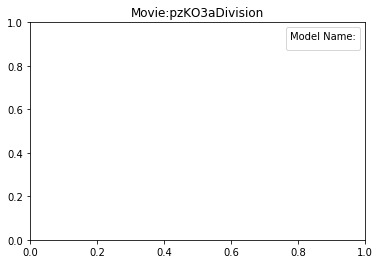

No handles with labels found to put in legend.


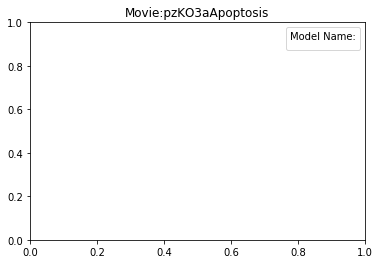

d20cl16
d29cl16
d38cl16
d47cl16


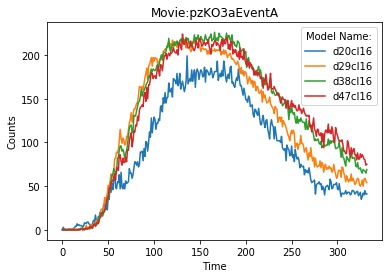

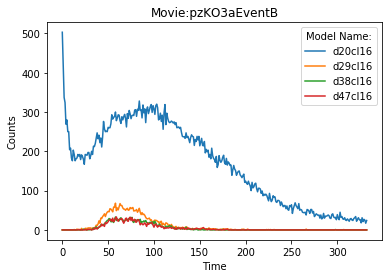

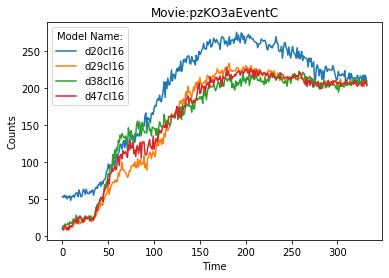

No handles with labels found to put in legend.


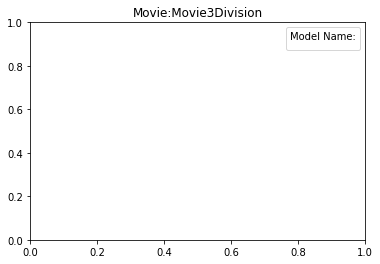

No handles with labels found to put in legend.


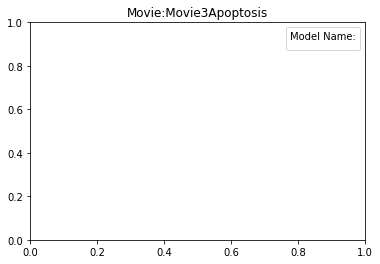

d20cl16
d29cl16
d38cl16
d47cl16


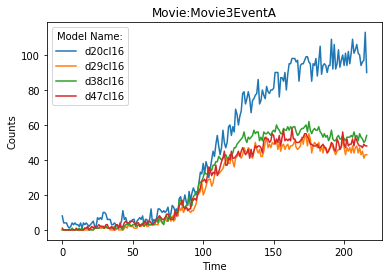

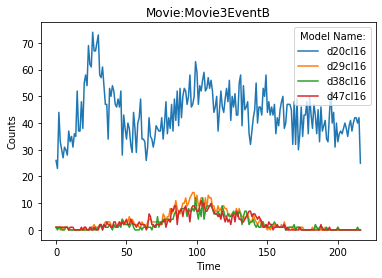

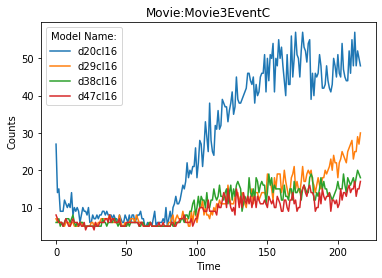

No handles with labels found to put in legend.


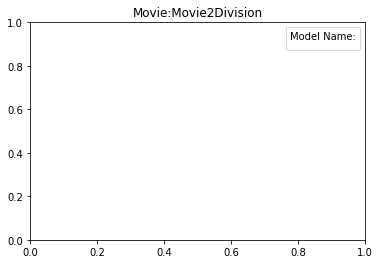

No handles with labels found to put in legend.


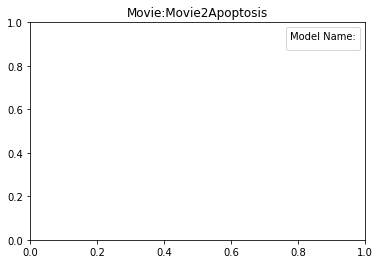

d20cl16
d29cl16
d38cl16
d47cl16


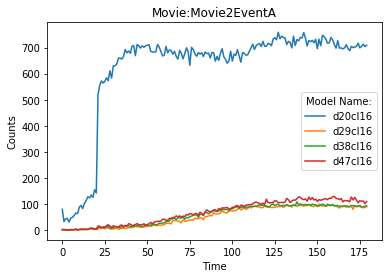

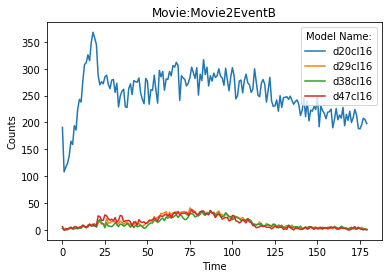

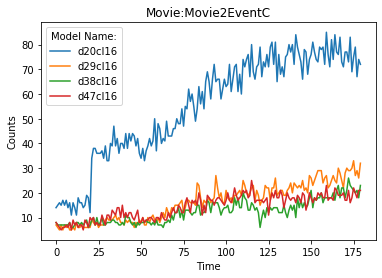

No handles with labels found to put in legend.


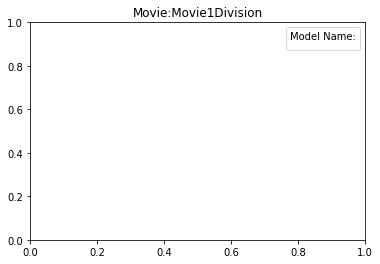

No handles with labels found to put in legend.


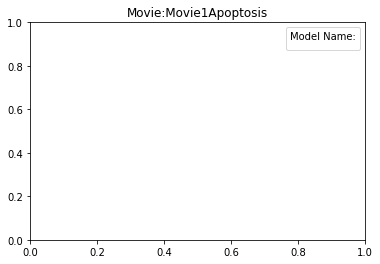

d20cl16
d29cl16
d38cl16
d47cl16


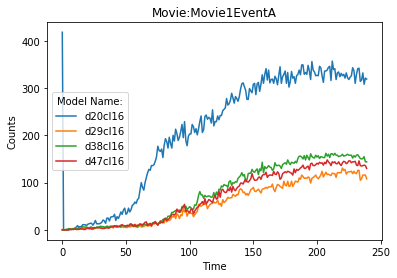

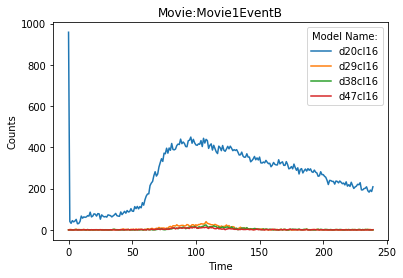

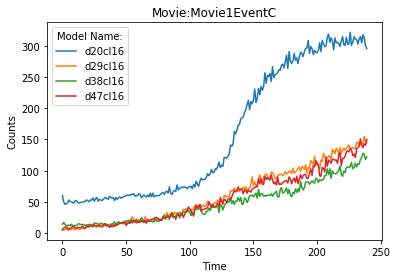

In [16]:
csv_dir = ['/Users/aimachine/ONEATTests/Movies/CSVResults/d20cl16/', '/Users/aimachine/ONEATTests/Movies/CSVResults/d29cl16/',
          '/Users/aimachine/ONEATTests/Movies/CSVResults/d38cl16/','/Users/aimachine/ONEATTests/Movies/CSVResults/d47cl16/']
image_dir =  '/Users/aimachine/ONEATTests/Movies/'
 

    
Raw_path = os.path.join(image_dir,'*.tif')
X = glob.glob(Raw_path)




Path(save_dir).mkdir(exist_ok = True)

for image_file in X:

  image= imread(image_file)
  image = np.asarray(image)
  Name = os.path.basename((os.path.splitext(image_file)[0])) 
  MasterTimeListDivision = []
  MasterEventListDivision = []


  MasterTimeListApoptosis = []
  MasterEventListApoptosis = []

  MasterTimeListNonMature = []
  MasterEventListNonMature = []

  MasterTimeListMature = []
  MasterEventListMature = []

  MasterTimeListMacrocheate = []
  MasterEventListMacrocheate = []

  MasterModelName = []
   

  for i in range(0, len(csv_dir)):
    
 
    csv_Name = Division + Name
    csv_file = csv_dir[i] + csv_Name + '.csv'
    

    ModelName = os.path.basename(os.path.dirname(csv_dir[i]))
    
    Mature = 'CNNMatureMNMCNNresnet_v2' + ModelName + 'Location'
    NonMature = 'CNNNonMatureMNMCNNresnet_v2'+ ModelName + 'Location'
    Macrocheate = 'CNNMacroKittyMNMCNNresnet_v2'+ ModelName + 'Location'
    MasterModelName = MasterModelName + [ModelName]
    if os.path.exists(csv_file):
      #Division Events
      MasterTimeListDivision,EventListDivision =  MultiCountTimeLapseevents(csv_file,image, csv_Name, save_dir)
      MasterEventListDivision.append(EventListDivision)
    
    
    #Apoptosis Events 
    csv_Name = Apoptosis + Name
    csv_file = csv_dir[i] + csv_Name + '.csv'

    if os.path.exists(csv_file):

      MasterTimeListApoptosis,EventListApoptosis = MultiCountTimeLapseevents(csv_file,image, csv_Name, save_dir)
      MasterEventListApoptosis.append(EventListApoptosis)
    #Mature Events 
    csv_Name = Mature + Name
    csv_file = csv_dir[i] + csv_Name + '.csv'

    if os.path.exists(csv_file):

      MasterTimeListMature,EventListMature = MultiCountTimeLapseevents(csv_file,image, 'Mature' + Name, save_dir)
      MasterEventListMature.append(EventListMature)
    #NonMature Events 
    csv_Name = NonMature + Name
    csv_file = csv_dir[i] + csv_Name + '.csv'

    if os.path.exists(csv_file):

      MasterTimeListNonMature,EventListNonMature = MultiCountTimeLapseevents(csv_file,image, 'NonMature' + Name, save_dir) 
      MasterEventListNonMature.append(EventListNonMature)
    #Macrocheate Events 
    csv_Name = Macrocheate + Name
    csv_file = csv_dir[i] + csv_Name + '.csv'

    if os.path.exists(csv_file):

      MasterTimeListMacrocheate,EventListMacrocheate = MultiCountTimeLapseevents(csv_file,image, 'MacroCheate'+ Name, save_dir)   
      MasterEventListMacrocheate.append(EventListMacrocheate)
  for i in range(0, len(MasterEventListDivision)):

      plt.plot(MasterTimeListDivision, MasterEventListDivision[i], label = MasterModelName[i])
      plt.ylabel('Counts')
      plt.xlabel('Time')
  plt.savefig(save_dir  + 'Division'   + '.png')
  plt.legend(title='Model Name:')
  plt.title('Movie:' + Name +  'Division')
  plt.show() 

  for i in range(0, len(MasterEventListApoptosis)):

        plt.plot(MasterTimeListApoptosis, MasterEventListApoptosis[i], label = MasterModelName[i])
        plt.ylabel('Counts')
        plt.xlabel('Time')
  plt.savefig(save_dir  + 'Apoptosis'   + '.png')
  plt.legend(title='Model Name:')
  plt.title('Movie:' + Name +  'Apoptosis')
  plt.show()

  for i in range(0, len(MasterEventListMature)):
        print(MasterModelName[i])
        plt.plot(MasterTimeListMature, MasterEventListMature[i],  label = MasterModelName[i])
        plt.ylabel('Counts')
        plt.xlabel('Time')
  plt.savefig(save_dir  + 'Mature'   + '.png') 
  plt.legend(title='Model Name:')
  plt.title('Movie:' + Name +  'EventA')
  plt.show()

  for i in range(0, len(MasterEventListNonMature)):


        plt.plot(MasterTimeListNonMature, MasterEventListNonMature[i],  label = MasterModelName[i])
        plt.ylabel('Counts')
        plt.xlabel('Time')
        plt.legend(MasterModelName[i])
  plt.savefig(save_dir  + 'NonMature'   + '.png') 
  plt.legend(title='Model Name:')
  plt.title('Movie:' + Name +  'EventB')
  plt.show()

  for i in range(0, len(MasterEventListMacrocheate)):

        plt.plot(MasterTimeListMacrocheate, MasterEventListMacrocheate[i],  label = MasterModelName[i])
        plt.ylabel('Counts')
        plt.xlabel('Time')
  plt.savefig(save_dir  + 'Macrocheate'   + '.png') 
  plt.legend(title='Model Name:')
  plt.title('Movie:' + Name +  'EventC')
  plt.show()

No handles with labels found to put in legend.


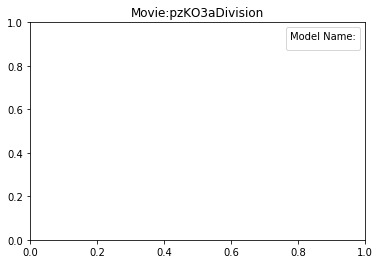

No handles with labels found to put in legend.


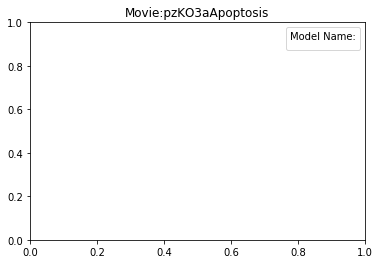

d29cl16
d38cl16
d47cl16


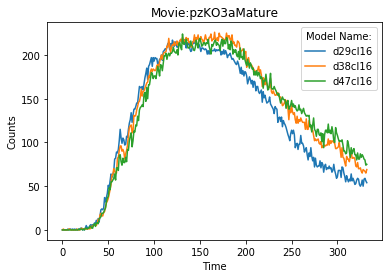

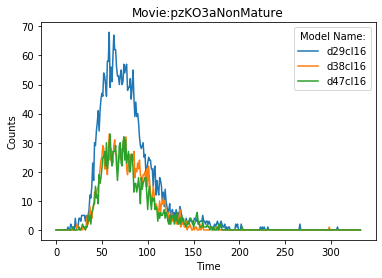

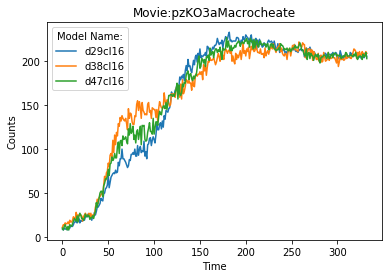

No handles with labels found to put in legend.


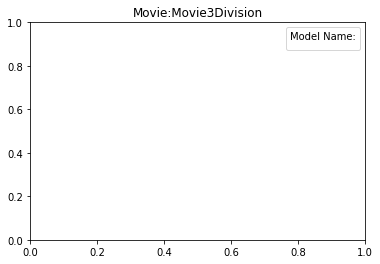

No handles with labels found to put in legend.


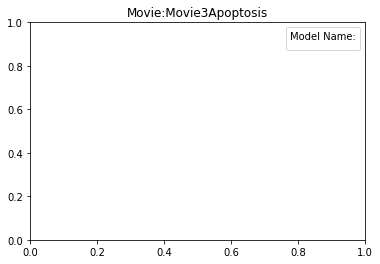

d29cl16
d38cl16
d47cl16


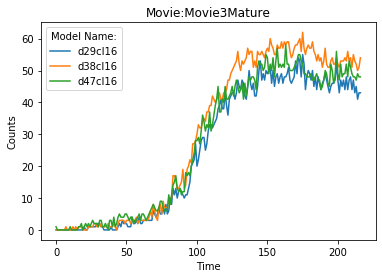

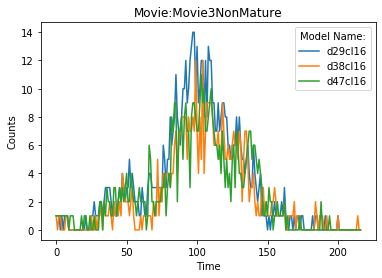

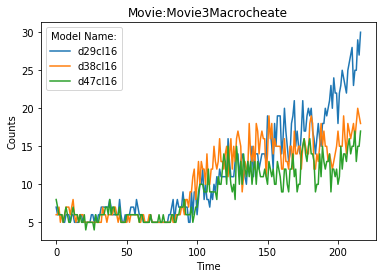

No handles with labels found to put in legend.


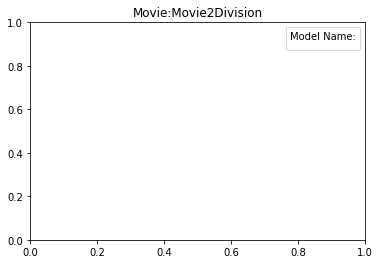

No handles with labels found to put in legend.


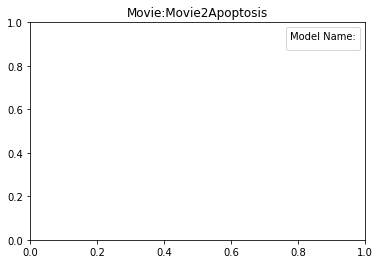

d29cl16
d38cl16
d47cl16


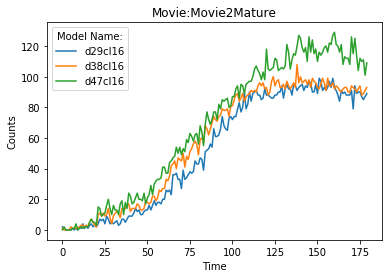

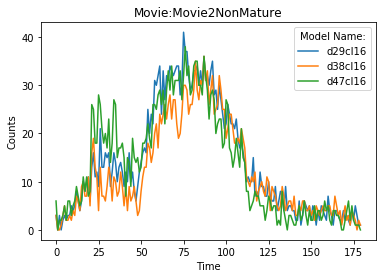

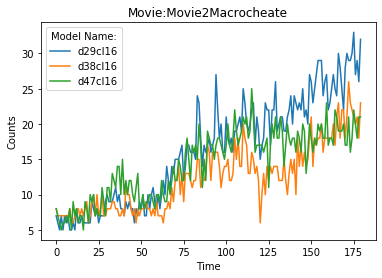

No handles with labels found to put in legend.


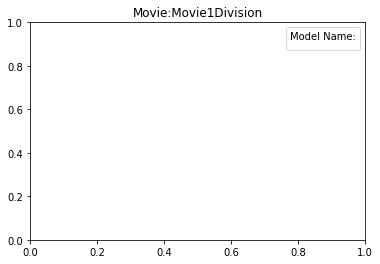

No handles with labels found to put in legend.


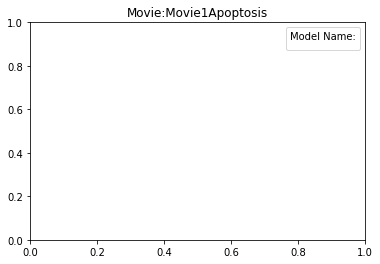

d29cl16
d38cl16
d47cl16


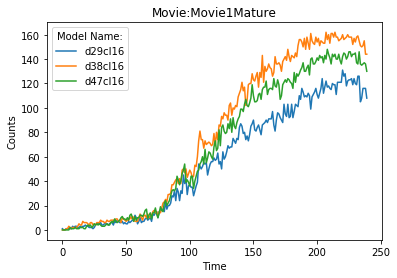

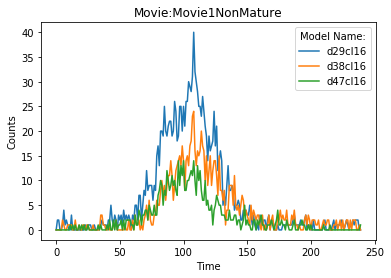

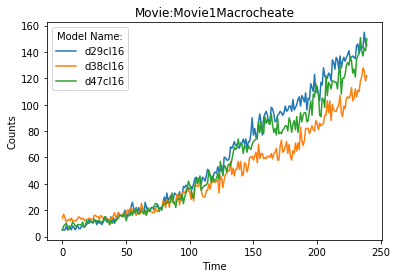

In [18]:
csv_dir = ['/Users/aimachine/ONEATTests/Movies/CSVResults/d29cl16/',
          '/Users/aimachine/ONEATTests/Movies/CSVResults/d38cl16/','/Users/aimachine/ONEATTests/Movies/CSVResults/d47cl16/']
image_dir =  '/Users/aimachine/ONEATTests/Movies/'
 

    
Raw_path = os.path.join(image_dir,'*.tif')
X = glob.glob(Raw_path)




Path(save_dir).mkdir(exist_ok = True)

for image_file in X:

  image= imread(image_file)
  image = np.asarray(image)
  Name = os.path.basename((os.path.splitext(image_file)[0])) 
  MasterTimeListDivision = []
  MasterEventListDivision = []


  MasterTimeListApoptosis = []
  MasterEventListApoptosis = []

  MasterTimeListNonMature = []
  MasterEventListNonMature = []

  MasterTimeListMature = []
  MasterEventListMature = []

  MasterTimeListMacrocheate = []
  MasterEventListMacrocheate = []

  MasterModelName = []
   

  for i in range(0, len(csv_dir)):
    
 
    csv_Name = Division + Name
    csv_file = csv_dir[i] + csv_Name + '.csv'
    

    ModelName = os.path.basename(os.path.dirname(csv_dir[i]))
    
    Mature = 'CNNMatureMNMCNNresnet_v2' + ModelName + 'Location'
    NonMature = 'CNNNonMatureMNMCNNresnet_v2'+ ModelName + 'Location'
    Macrocheate = 'CNNMacroKittyMNMCNNresnet_v2'+ ModelName + 'Location'
    MasterModelName = MasterModelName + [ModelName]
    if os.path.exists(csv_file):
      #Division Events
      MasterTimeListDivision,EventListDivision =  MultiCountTimeLapseevents(csv_file,image, csv_Name, save_dir)
      MasterEventListDivision.append(EventListDivision)
    
    
    #Apoptosis Events 
    csv_Name = Apoptosis + Name
    csv_file = csv_dir[i] + csv_Name + '.csv'

    if os.path.exists(csv_file):

      MasterTimeListApoptosis,EventListApoptosis = MultiCountTimeLapseevents(csv_file,image, csv_Name, save_dir)
      MasterEventListApoptosis.append(EventListApoptosis)
    #Mature Events 
    csv_Name = Mature + Name
    csv_file = csv_dir[i] + csv_Name + '.csv'

    if os.path.exists(csv_file):

      MasterTimeListMature,EventListMature = MultiCountTimeLapseevents(csv_file,image, 'Mature' + Name, save_dir)
      MasterEventListMature.append(EventListMature)
    #NonMature Events 
    csv_Name = NonMature + Name
    csv_file = csv_dir[i] + csv_Name + '.csv'

    if os.path.exists(csv_file):

      MasterTimeListNonMature,EventListNonMature = MultiCountTimeLapseevents(csv_file,image, 'NonMature' + Name, save_dir) 
      MasterEventListNonMature.append(EventListNonMature)
    #Macrocheate Events 
    csv_Name = Macrocheate + Name
    csv_file = csv_dir[i] + csv_Name + '.csv'

    if os.path.exists(csv_file):

      MasterTimeListMacrocheate,EventListMacrocheate = MultiCountTimeLapseevents(csv_file,image, 'MacroCheate'+ Name, save_dir)   
      MasterEventListMacrocheate.append(EventListMacrocheate)
  for i in range(0, len(MasterEventListDivision)):

      plt.plot(MasterTimeListDivision, MasterEventListDivision[i], label = MasterModelName[i])
      plt.ylabel('Counts')
      plt.xlabel('Time')
  plt.savefig(save_dir  + 'Division'   + '.png')
  plt.legend(title='Model Name:')
  plt.title('Movie:' + Name +  'Division')
  plt.show() 

  for i in range(0, len(MasterEventListApoptosis)):

        plt.plot(MasterTimeListApoptosis, MasterEventListApoptosis[i], label = MasterModelName[i])
        plt.ylabel('Counts')
        plt.xlabel('Time')
  plt.savefig(save_dir  + 'Apoptosis'   + '.png')
  plt.legend(title='Model Name:')
  plt.title('Movie:' + Name +  'Apoptosis')
  plt.show()

  for i in range(0, len(MasterEventListMature)):
        print(MasterModelName[i])
        plt.plot(MasterTimeListMature, MasterEventListMature[i],  label = MasterModelName[i])
        plt.ylabel('Counts')
        plt.xlabel('Time')
  plt.savefig(save_dir  + 'Mature' + Name  + '.png') 
  plt.legend(title='Model Name:')
  plt.title('Movie:' + Name +  'Mature')
  plt.show()

  for i in range(0, len(MasterEventListNonMature)):


        plt.plot(MasterTimeListNonMature, MasterEventListNonMature[i],  label = MasterModelName[i])
        plt.ylabel('Counts')
        plt.xlabel('Time')
        plt.legend(MasterModelName[i])
  plt.savefig(save_dir  + 'NonMature'+ Name   + '.png') 
  plt.legend(title='Model Name:')
  plt.title('Movie:' + Name +  'NonMature')
  plt.show()

  for i in range(0, len(MasterEventListMacrocheate)):

        plt.plot(MasterTimeListMacrocheate, MasterEventListMacrocheate[i],  label = MasterModelName[i])
        plt.ylabel('Counts')
        plt.xlabel('Time')
  plt.savefig(save_dir  + 'Macrocheate'+ Name   + '.png') 
  plt.legend(title='Model Name:')
  plt.title('Movie:' + Name +  'Macrocheate')
  plt.show()

###### 